#**Lição 3 - *Long Short-Term Memory***

# 1 - **Introdução** <a class="anchor" name="section_1"></a>

### 1.1 Índice <a class="anchor" name="section_1.1"></a>

* [1 Introdução](#section_1)
    * [1.1 Índice](#section_1.1)
    * [1.2 Redes Neurais Recorrentes](#section_1.2)
    * [1.3 LSTM](#section_1.3)
    * [1.4 GRU](#section_1.4)

* [2 Modelo Matemático - LSTM](#section_2)
    * [2.1 Acesso de entrada (Input gate)](#section_2.1)
    * [2.2 Acesso de esquecimento (Forget gate)](#section_2.2)
    * [2.3 Acesso de saída (Output gate)](#section_2.3)

* [3 Aplicações](#section_3)
    * [3.1 Sutura automatizada](#section_3.1)
    * [3.2 Geração de música](#section_3.2)
    * [3.3 Tradução automática](#section_3.3)

* [4 Problemática](#section_4)

* [5 Implementação](#section_5)
    * [5.1 Importando bibliotecas](#section_5.1)
    * [5.2 Testando GPU](#section_5.2)
    * [5.3 Tratamento do Dataset](#section_5.3)

* [6 Sugestões](#section_6)

* [7 Referências](#section_7)
    

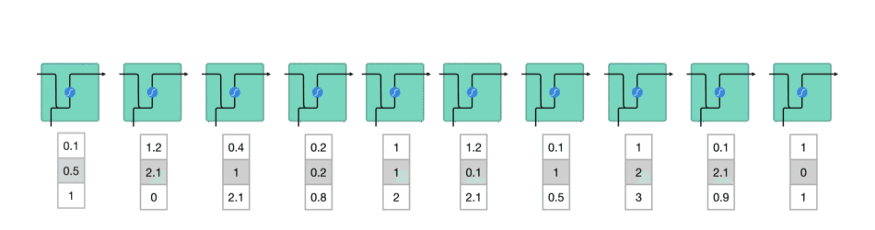

## 1.2 Redes Neurais Recorrentes<a class="anchor" name="section_1.2"></a>

Redes Neurais Recorrentes são modelos de aprendizagem de máquina especializados em tratar dados sequenciais. 

Basicamente, dados sequenciais são dados que apresentam particular relevância em suas ordenações. Séries temporais, como áudio e vídeo, são naturalmente sequenciais, assim como textos, e por isso são os tipos de dados mais utilizados em RNNs. No entanto, outros tipos de dados também podem ser tratados como sequenciais em aplicações específicas, como por exemplo uma imagem pode ser lida como uma sequência de elementos ordenados em uma composição.

O motivo pelo qual as RNNs são especializadas em tratar dados desse tipo é a presença de um mecanismo chamado “memória sequencial”. Esse mecanismo permite que a rede guarde uma representação de entradas anteriores, denominada “estado oculto” (*hidden state*), que preserva informações passadas para facilitar o reconhecimento de padrões sequenciais ao processar uma nova entrada.



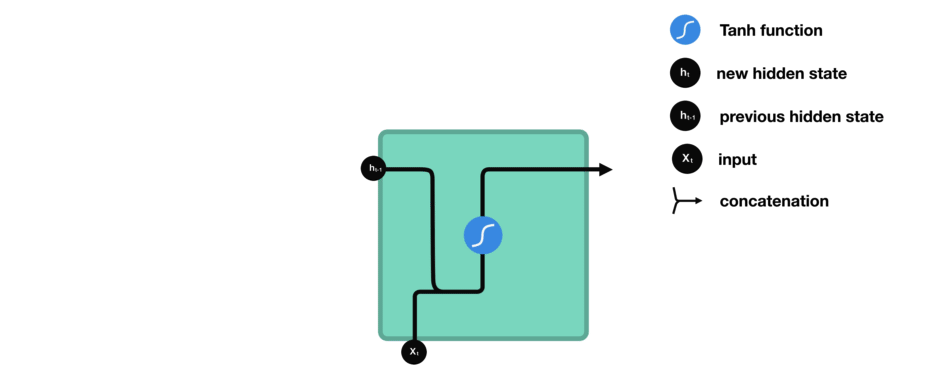

Para exemplificar, suponhamos que deseja-se implementar um *chatbot* para classificar as intenções dos usuários a partir de uma mensagem de texto. Nesse caso, primeiro precisamos codificar o texto de entrada utilizando uma RNN e em seguida passamos a saída dessa rede à uma outra rede, que funcionará como classificadora.

Suponhamos ainda que um usuário entra com o texto “*what time is it?*”. O primeiro passo é particionar a mensagem em palavras, ja que a RNN recebe dados sequenciais e, portanto, passaremos a ela uma palavra por vez.

O segundo passo é fornecer a primeira palavra (“*what*”) à rede, que a codificará e produzirá uma saída, bem como uma modificação do estado oculto. O próximo passo é fornecer a palavra seguinte (“*time*”) e o estado oculto anterior à rede, que produzirá uma nova saída e uma nova modificação do estado oculto (que agora contém informações das palavras “*what*” e “*time*”). Esse processo é repetido até que todas as palavras sejam fornecidas à rede.

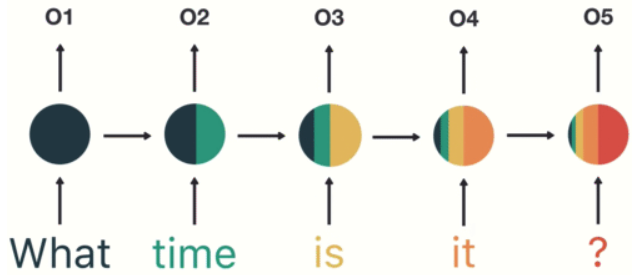

A saída do último passo deverá conter uma representação de todas as palavras do texto fornecido pelo usuário, e dessa forma pode ser passada à rede classificadora para que a intenção do usuário seja classificada.

Para implementar o modelo, o algoritmo é o seguinte: 

i - inicializar as camadas e o estado oculto da rede, atentando para que haja compatibilidade nas dimensões e shapes de cada camada; 

ii - passar as entradas e os estados ocultos pra RNN, uma por vez, que retornará uma codificação das entradas e uma modificação do estado oculto; 

iii - passar a saída da RNN para o classificador, que retornará uma predição.

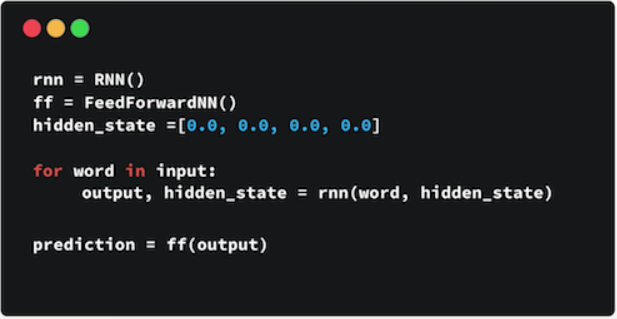

Uma observação importante que deve ser feita neste ponto é que a representação final da RNN tem dificuldade em reter informação a respeito das primeiras palavras. Esta característica é chamada de “memória de curto prazo”, que é uma consequência do “desaparecimento do gradiente” (*vanishing gradient*) e pode se tornar um problema em diversas situações.

Devido ao desaparecimento do gradiente, as RNNs não aprendem relações sequenciais de passos muito distantes. Isso quer dizer que as palavras “*what*” e “*time*” do nosso exemplo provavelmente não são levadas em consideração ao tentar prever a intenção do usuário. Essa memória de curto prazo levou à proposição de arquiteturas alternativas, as quais são especializadas no longo prazo. As mais clássicas são a ***Gated Recurrent Unit*** (GRU) e a ***Long Short Term Memory*** (LSTM).

Essas arquiteturas funcionam essencialmente da mesma forma que as RNNs, diferindo na capacidade de aprender relações sequenciais distantes devido à presença de mecanismos denominados “acessos” (*gates*). Esses acessos são diferentes operações tensoriais que aprendem quais informações adicionar ou remover do estado oculto, seguindo uma ordem de relevância.

A diferença entre as LSTMs e as GRUs estão nos acessos e nas operações tensoriais que compõem a arquitetura de cada uma delas, mas ambas têm basicamente o mesmo intuito. Uma prática comum em aplicações que envolvem essas arquiteturas é implementar ambos os modelos e comparar os resultados de cada um deles, para que se possa definir qual o mais adequado à situação em questão.

## 1.3 - LSTM<a class="anchor" name="section_1.3"></a>





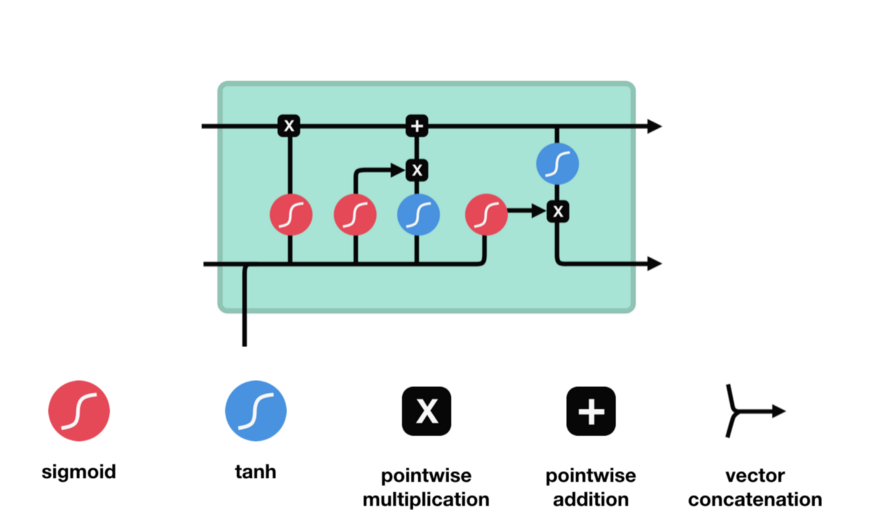

Os conceitos principais das LSTMs são o estado da célula e seus vários acessos. A estado da célula atua como um caminho para a informação, [teoricamente] memorizando o que é importante e descartando o que não é. Uma célula de LSTM é composta por três acessos: acesso de esquecimento (*forget gate*), acesso de entrada (*input gate*) e acesso de saída (*output gate*).

O **acesso de esquecimento** é o responsável por decidir quais informações devem ser descartadas e quais devem ser guardadas. Esse acesso recebe um vetor que contém informações do estado oculto e da entrada atual, e aplica a função sigmoid. Essa função condiciona os valores do vetor para o intervalo [0,1]. Valores próximos a zero significam esquecimento e valores próximos a um significam memorização. Por fim, é computado o produto da saída da sigmoid com o vetor que representa o estado da célula anterior.

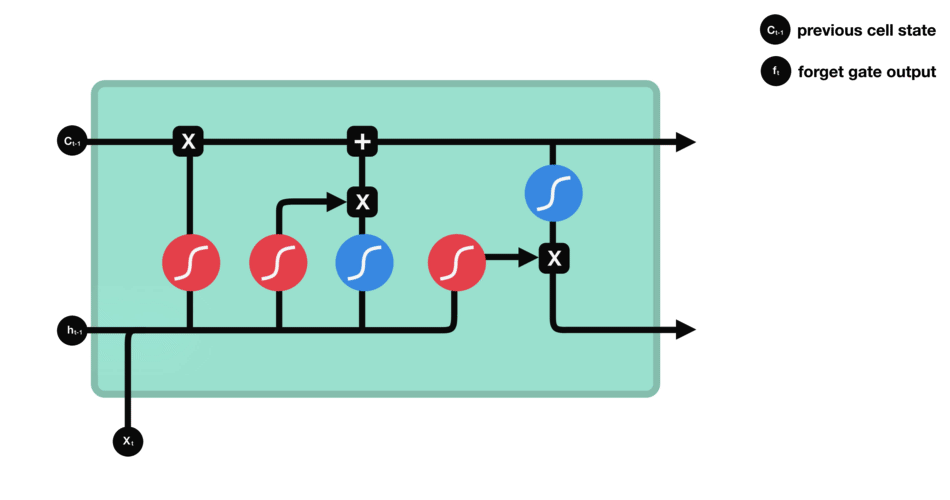

O **acesso de entrada** é responsável por atualizar o estado da célula. Primeiro, o vetor que representa o estado oculto anterior e o vetor que representa a entrada atual são concatenados. O vetor resultante é passado paralelamente por uma função sigmoid e por uma função tanh (tangente hiperbólica). A sigmoid é aplicada no intuito de decidir quais valores serão passados adiante (valores próximos a 1) e quais serão esquecidos (valores próximos a 0). A função tanh condiciona o vetor ao intervalo [-1,1], no intuito de ajudar a regular a rede. É computado o produto dos resultados de cada operação, para por fim somar ao vetor que representa o estado da célula anterior (já multiplicado pela saída do acesso de esquecimento), de forma que o resultado final representa o estado da célula atualizado.

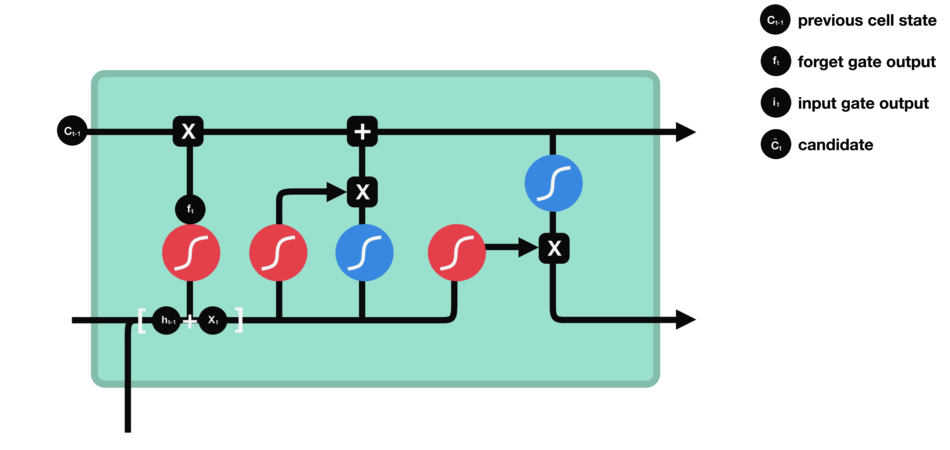

O **acesso de saída** é responsável por decidir qual deve ser o próximo estado oculto. Primeiro, o estado oculto anterior e a entrada atual são concatenados e passados por uma função sigmoid. Depois, o estado da célula atualizado é passado por uma função tanh. A saída da sigmoid é então multiplicada pela saída da tanh, para definir quais informações o estado oculto deve carregar. O estado oculto e o estado da célula são as saídas dessa célula, e são passadas ao próximo passo.

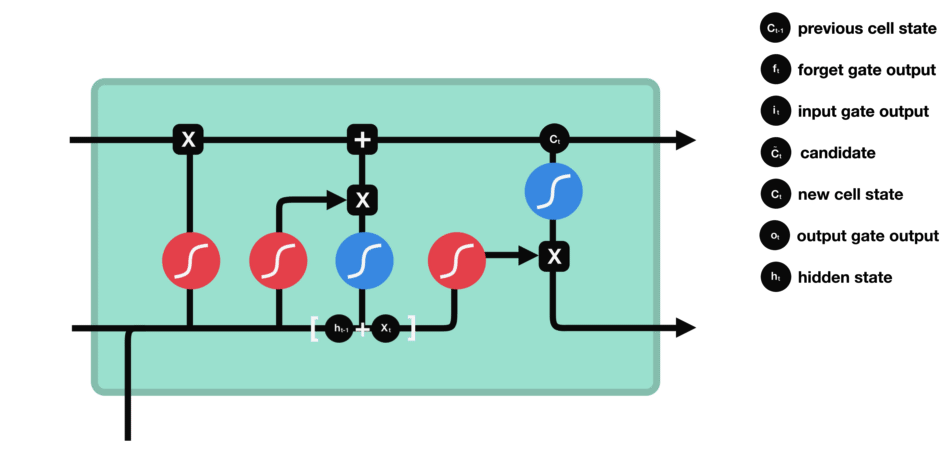

Em suma, o acesso de esquecimento decide o que é relevante manter dos passos anteriores; o acesso de entrada decide o que é relevante adicionar ao passo atual; e o acesso de saída define o próximo estado oculto.

Para implementação, o algoritmo é o seguinte:
1. Primeiro, o estado oculto anterior e a entrada atual são concatenados, gerando o “vetor combinado”.
2. O vetor combinado é passado ao acesso de esquecimento, que removerá informações não relevantes.
3. A partir do vetor combinado, é criado um candidato ao próximo estado da célula, ou seja, guarda possíveis valores a serem adicionados ao estado da célula.
4. O vetor combinado é passado ao acesso de entrada, que decidirá quais dados do candidato devem ser passados ao novo estado da célula.
5. O novo estado da célula é computado utilizando o estado da célula anterior e as saídas dos acessos de esquecimento e de entrada.
6. A saída é computada no acesso de saída.
7. O novo estado oculto é calculado pelo produto da saída pelo estado da célula.

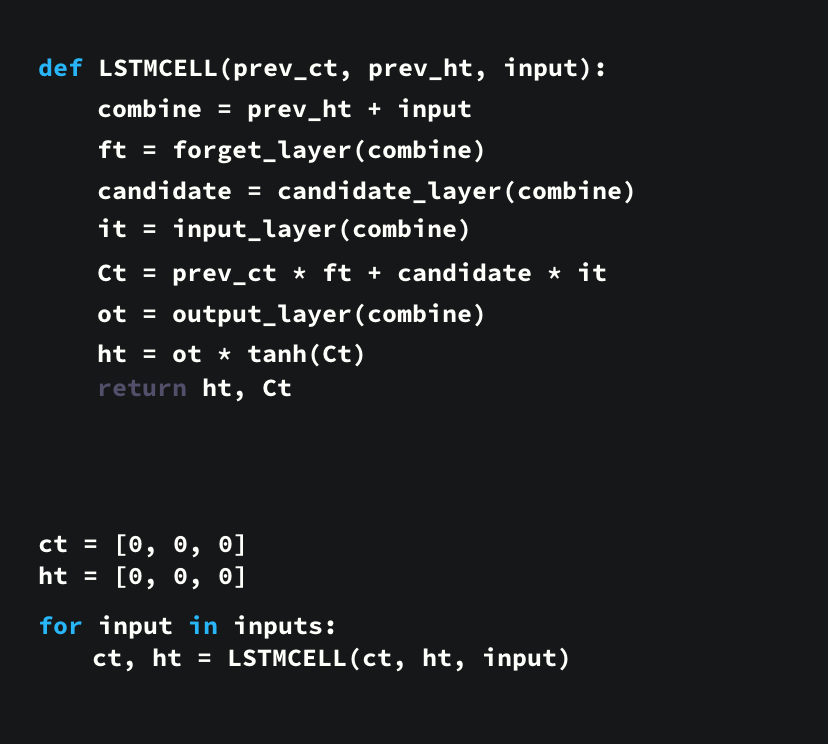

## 1.4 GRU<a class="anchor" name="section_1.4"></a>

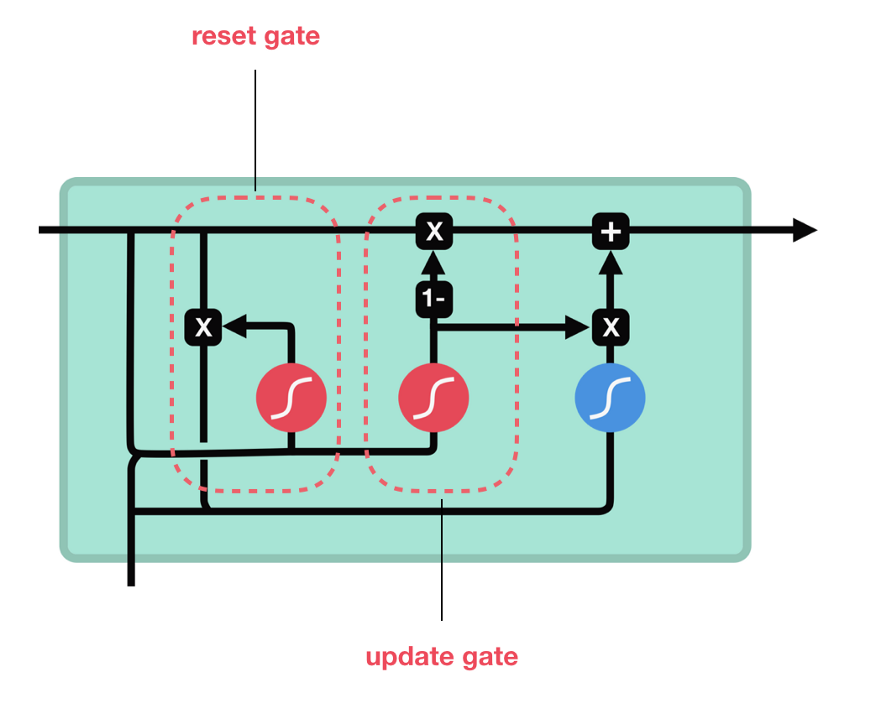

GRUs são a arquitetura mais nova de RNNs e são bem similares às LSTMs. A diferença é que as GRUs são compostas por apenas dois acessos: o acesso de atualização e o acesso de redefinição.

O **acesso de atualização** decide quais informações descartar e quais adicionar ao estado oculto. Funciona de forma similar aos acessos de esquecimento e de entrada de uma LSTM.

O **acesso de redefinição** também atua na decisão de quais informações passadas devem ser esquecidas.

# 2 - **Modelo matemático - LSTM**<a class="anchor" name="section_2"></a>


##2.1 - Acesso de entrada (input gate)<a class="anchor" name="section_2.1"></a>

### Responsável por decidir quais informações, presentes na entrada e na memória de curto prazo, vão ser armazenadas na memória de longo prazo. Para tal é necessário filtrar as informações não úteis dessas variáveis. Isso é feito com a utilização de duas camadas:  

### A primeira faz o papel do filtro a partir da função ***sigmoid***, por onde serão passadas a entrada e memória de curto prazo, transformando cada informação em 0 ou 1, indicando respectivamente se é inútil ou importante. Conforme a rede é treinada, os pesos dessa função são atualizados até que ela só deixe passar as informações úteis e descarte as demais. A expressão matemática que representa a relação descrita é a seguinte:


## $ i_1 = \sigma(W_{i_1} \cdot (H_{t-1}, x_t) + b_{i_1}) $  

#####  onde:  
##### $i_1$ é a saída da primeira camada;  
##### $\sigma$ representa a função ***sigmoid***;  
##### $W_{i_1}$ é o peso (Weight) para a primeira camada;  
##### $H_{t-1}$ é a memória de curto prazo;  
##### $x_t$ é a entrada;  
##### $b_{i_1}$ é o bias para a primeira camada. 

### A segunda camada pega as mesmas informações, entrada e memória de curto prazo, e passa pela função de ativação, geralmente tangente hiperbólica, para regular a rede, conforme a expressão:



## $ i_2 = tanh(W_{i_2} \cdot (H_{t-1}, x_t) + b_{i_2}) $ 

#####  onde:  
##### $i_2$ é a saída da segunda camada;  
##### ***$tanh$*** representa a função tangente hiperbólica;  
##### $W_{i_2}$ é o peso para a segunda camada;  
##### $H_{t-1}$ é a memória de curto prazo;  
##### $x_t$ é a entrada;  
##### $b_{i_2}$ é o bias para a segunda camada. 

### As saídas dessas 2 camadas são multiplicadas e o produto representa a informação que será guardada na memória de longo prazo.

## $ i = i_1 \cdot i_2 $




##2.2 - Acesso de esquecimento (Forget gate)<a class="anchor" name="section_2.2"></a>

### Decide quais informações da memória de longo prazo serão mantidas ou descartadas. Isso é feito a partir de um "vetor de esquecimento", um filtro análogo ao da primeira camada do partão de entrada, também passando a entrada $x_t$ e a memória de curto prazo por uma função ***sigmoid***, sendo a única diferença o peso aplicado. O vetor, composto de 0's e 1's, será multiplicado pela memória de longo prazo para escolher quais partes serão mantidas. A expressão matemática que representa o processo é mostrada a seguir:

## $ f = \sigma(W_{esquecer} \cdot (H_{t-1}, x_t) + b_{esquecer})$

#####  onde:  
##### $f$ é o vetor de esquecimento;  
##### $\sigma$ representa a função ***sigmoid***;  
##### $W_{esquecer}$ é o peso;  
##### $H_{t-1}$ é a memória de curto prazo;  
##### $x_t$ é a entrada;  
##### $b_{esntrada}$ é o bias.

### As saídas dos acessos  de entrada e de esquecimento serão somadas, como mostra a expressão abaixo, para a obtenção de uma nova memória de longo prazo, que será usada no acesso de saída.

## $C_t = C_{t-1} \cdot f + i $ 

##### onde:
##### $C_t$ é a nova memória de longo prazo;  
##### $C_{t-1}$ é a antiga memória de longo prazo;
##### $f$ é o vetor de esquecimento;
##### $i$ é a saída do acesso de entrada.


## 2.3 - Acesso de saída (Output gate)<a class="anchor" name="section_2.3"></a>

### O acesso de saída pega a entrada, a antiga memória de curto prazo e a nova memória de longo prazo para produzir a nova memória de curto prazo.  

### Primeiro, a antiga memória de curto prazo e a entrada passam por uma função ***sigmoid*** com diferentes pesos, para criar mais um filtro. Depois, a nova memória de longo prazo é submetida à função de tangente hiperbólica. As saídas desses processos serão multiplicados para a obtenção da nova memória de curto prazo. A representação matemática para esses processos é mostrada a seguir:

## $ O_1 = \sigma (W_{saída_1} \cdot (H_{t-1}, x_t) + b_{saída_1})$

## $ O_2 = tanh (W_{saída_2} \cdot C_t + b_{saída_2})$

## $H_t, O_t = O_1 \cdot O_2 $

##### onde: 
##### O_1 e O_2 são as saídas das funções ***sigmoid*** e $tanh$, respectivamente;

##### $H_t$ é a nova memória de curto prazo;

##### O_t é a saída do acesso.


# 3 - **Aplicações**<a class="anchor" name="section_3"></a>


## 3.1 - Sutura automatizada<a class="anchor" name="section_3.1"></a>

### Uso de LSTM para que um robô, a partir de demonstrações do procedimento feito por humanos, reconheça e aplique a sequência de movimentos necessários para suturar um corte.


## 3.2 - Geração de música<a class="anchor" name="section_3.2"></a>

### A arquitetura LSTM tem a capacidade de reconhecer dependências em longos períodos de tempo, logo, dado um dataset de músicas, ela é capaz de determinar as notas normalmente utilizadas em sequência ou que pertencem à mesma escala e compor a própria música a partir disso.



## 3.3 - Tradução automática<a class="anchor" name="section_3.3"></a>

### O reconhecimento de dependências também se aplica à linguagem e gramática, sendo capaz de perceber as regras que regem o idioma, a forma que são utilizadas as expressões e correlacionar com outros padrões (idiomas).

# 4 - **Problemática**<a class="anchor" name="section_4"></a>

## Classificação de notícias reais e falsas

Para demonstração do algoritmo proposto, nos debruçaremos sobre uma questão de grande interesse atualmente: o reconhecimento de "*fake news*". Para isso, faremos uso de um *dataset* composto por notícias extraídas da web e que já está separado, convenientemente, entre notícias verdadeiras e notícias falsas.

O *dataset* em questão foi fornecido pelo Kaggle, e pode ser acessado clicando [aqui](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).


# 5 - **Implementação**<a class="anchor" name="section_5"></a>

## 5.1 - Importando bibliotecas <a class="anchor" name="section_5.1"></a>

O primeiro passo, já que estamos trabalhando no Google Colab, é montar o drive. Isso é, precisamos definir como diretório padrão o Google Drive, para que dentro do código possamos acessar os arquivos auxiliares (como o arquivo que contém o *dataset* ou algum arquivo .py que fôssemos fazer uso). 

Para isso, basta rodar a célula abaixo e seguir as instruções indicadas:

In [25]:
# Habilita o acesso ao drive
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


A seguir, precisamos importar as bibliotecas que utilizaremos na nossa implementação.

In [26]:
# Operações matriciais
import numpy as np

# Plotagem de gráficos
from matplotlib import pyplot
%matplotlib inline

# Redes neurais
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

# Tratamento do dataset
import pandas as pd

# Contador
from collections import Counter

# Operações com strings
from string import punctuation

# Pseudo-aleatórios
import random


## 5.2 - Testando GPU<a class="anchor" name="section_5.2"></a>

Dada a complexidade do problema que estamos tratando, é interessante utilizar algum acelerador de processamento para que o algoritmo rode mais rápido. Para nossa sorte, o Colab oferece GPUs aos seus usuários de forma gratuita, sujeita à disponibilidade.

Para habilitá-la, faça o seguinte:

- Clique em "**Ambiente de execução**" no canto superior esquerdo desta página;
- Clique em "**Alterar o tipo de ambiente de execução**"; 
- Selecione "**GPU**" em "**Acelerador de hardware**";
- Rode a célula de código a seguir.

Caso haja disponibilidade, a GPU já deve estar habilitada para uso. Observe o retorno que será imprimido na tela.



In [27]:
def testar_gpu():
	train_on_gpu = torch.cuda.is_available() # Observa se a GPU está disponivel
	if train_on_gpu: # Se sim
		device = torch.device('cuda') # Seleciona o device como GPU
		print("Treinando na GPU.") # E imprime na tela
	else: # Caso contrário
		device = torch.device('cpu') # Seleciona o device como CPU
		print("GPU indisponível, treinando na CPU.") # E avisa que a GPU não esta disponível
	return device

device = testar_gpu()

Treinando na GPU.


## 5.3 - Tratamento do Dataset<a class="anchor" name="section_5.3"></a>

Para utilizar o *dataset*, é necessário primeiro carregá-lo em alguma variável em código e realizar um pré-processamento. Este pré-processamento tem a função de adequar os dados como parâmetros de entrada da rede e será mais bem detalhado adiante.

A célula a seguir atribuirá os dados contidos no arquivo "Fake.csv" à variável `data_fake`, e apresentará em seguida uma visualização de alguns exemplos.



In [28]:
data_fake = pd.read_csv('/content/drive/My Drive/PANGEIA/LSTM/Dataset/Fake.csv') # Atribui à variável os dados do arquivo csv, que contém as notícias já classificadas como falsas
data_fake.head() # Visualização de dados

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Podemos observar que cada linha contém um exemplo com 4 informações: manchete (**title**), texto (**text**), assunto (**subject**) e data (**date**) da notícia.

Faremos algo bastante similar com os dados de notícias verdadeiras na célula a seguir.

In [29]:
data_true = pd.read_csv('/content/drive/My Drive/PANGEIA/LSTM/Dataset/True.csv') # Atribui à variável os dados do arquivo csv, que contém as notícias já classificadas como verdadeiras
data_true.head() # Visualização de dados

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Para os fins desejados, as informações de assunto e data podem ser descartadas. Utilizaremos portanto apenas a manchete e o texto das notícias, que serão concatenados formando uma única string.

Precisamos também compatibilizar o tipo dos dados com o requerido pela rede, que é do tipo `torch.Tensor`. Criaremos primeiro uma lista com todos os exemplos para posteriormente transformá-la em um tensor do Pytorch.

In [30]:
datafake = data_fake['title'] + ' ' + data_fake['text'] # Concatena o texto da manchete com o texto do corpo da notícia 
listfake = list(datafake) # Transforma a variável em lista

datatrue = data_true['title'] + ' ' + data_true['text'] # Concatena o texto da manchete com o texto do corpo da notícia 
listtrue = list(datatrue) # Transforma a variável em lista

dataset = [] # Cria lista que será composta por exemplos falsos e verdadeiros
dataset.extend(listfake) # Adiciona os exemplos falsos
dataset.extend(listtrue) # Adiciona os exemplos verdadeiros

labels = [False]*len(listfake)+[True]*len(listtrue) # Cria a lista que conterá os rótulos dos exemplos

print("Primeiro exemplo fake:", listfake[0])
print("Número de exemplos fake:", len(listfake))
print()
print("Primeiro exemplo real:", listtrue[0])
print("Número de exemplos reais:", len(listtrue))
print()
print("Número total de exemplos:", len(dataset))

Primeiro exemplo fake:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year

Um passo importante é padronizar o dataset de forma que fique mais "legível" para a rede sem perder informações relevantes. São interessantes mudanças como colocar todo o texto em caixa baixa e descartar as pontuações.

Outro ponto importante é gerar uma lista com todas as palavras do *dataset*.

In [31]:
words = [] # Cria a lista que conterá todas as palavras contidas no dataset

for i in range(len(dataset)):
  dataset[i] = dataset[i].lower() # Padroniza todo o texto em caixa baixa
  dataset[i] = ''.join([c for c in dataset[i] if c not in punctuation]) # Elimina a pontuação

  # Troca quebras de linha (se houver) por espaço
  text = dataset[i]
  text_split = text.split('\n')
  all_text = ' '.join(text_split)

  words.extend(all_text.split()) # Adiciona todas as palavras do exemplo em questão à lista de palavras

# Embaralha aleatoriamente o dataset e os labels, mantendo a correspondência mútua
datasetandlabels = list(zip(dataset, labels)) # Acopla as duas variáveis
random.shuffle(datasetandlabels) # Embaralha aleatoriamente
dataset, labels = zip(*datasetandlabels) # Desacopla as duas variáveis

print("Número de palavras:", len(words))

Número de palavras: 18698549


A partir da lista de palavras gerada, podemos criar um dicionário com cada palavra presente no *dataset* para que possamos codificar os exemplos de uma forma conveniente.

Como a rede recebe na entrada vetores numéricos, podemos substituir cada palavra pelo seu índice correspondente no dicionário criado.

In [32]:
# Cria um dicionário que mapeará as palavras em números inteiros ("índices")
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

# Substitui cada palavra pelo índice correspondente, de acordo com o dicionário criado
text_ints = []
for i in range(len(dataset)):
    text_ints.append([vocab_to_int[word] for word in dataset[i].split()])

print("Número de palavras únicas:", len((vocab_to_int))) 
print()
print("Exemplo de representação em palavras:", dataset[0].split())
print()
print("Exemplo de representação em índices do dicionário:", text_ints[0])

Número de palavras únicas: 253159

Exemplo de representação em palavras: ['college', 'qb', 'kneed', 'out', 'of', 'anger', 'over', 'trump’s', 'remarks', 'about', 'nfl', 'players', 'disrespecting', 'our', 'flag…immediately', 'gets', 'bad', 'news', 'from', 'coach', 'he', 'was', 'given', 'the', 'option', 'to', 'kneel', 'in', 'protest', 'before', 'the', 'game', 'but', 'it', 'was', 'more', 'important', 'for', 'him', 'to', 'take', 'a', 'stand', 'against', 'our', 'president', 'for', 'bravely', 'taking', 'a', 'public', 'stance', 'in', 'defense', 'of', 'our', 'flag', 'and', 'for', 'our', 'veterans', 'a', 'liberal', 'arts', 'college', 'in', 'eastern', 'pennsylvania', 'cut', 'its', 'backup', 'quarterback', 'after', 'he', 'knelt', 'during', 'the', 'national', 'anthemalbright', 'college', 'in', 'reading', 'cut', 'gyree', 'durante', 'from', 'its', 'team', 'after', 'he', 'took', 'a', 'knee', 'during', 'the', 'starspangled', 'banner', 'according', 'to', 'the', 'philadelphia', 'inquireraccording', 'to',

Uma outra questão que deve ser tratada é o comprimento dos exemplos do *dataset*. A rede neural que iremos implementar recebe vetores de comprimento fixo, mas não podemos esperar essa característica dos exemplos do nosso *dataset*, já que as notícias apresentam quantidade de palavras variável.

Analisemos então algumas estatísticas relacionadas aos comprimentos dos exemplos do *dataset*.

In [33]:
# outlier review stats
text_lens = Counter([len(x) for x in text_ints]) # "Lista" com o número de palavras de cada exemplo do dataset
lens_sum = 0
divisor = 0

# Cálculo do tamanho médio
for i in range(max(text_lens)):
  lens_sum += i*text_lens[i] # Produto da quantidade de palavras pela quantidade de exemplos que tem essa quantidade de palavras
  divisor += text_lens[i] # Número de exemplos com a quantidade de palavras que está sendo analisada
average_len = lens_sum/divisor # Média ponderada tamanho*ocorrências/total

print("Quantidade média de palavras: {}".format(average_len))
print("Quantidade máxima de palavras: {}".format(max(text_lens)))

Quantidade média de palavras: 416.1234631147541
Quantidade máxima de palavras: 8135


Para não perder nenhuma informação, poderíamos escolher o comprimento padrão como sendo a quantidade máxima de palavras e completar os demais exemplos com valores nulos para que todos tivessem o tamanho do maior exemplo. No entanto, essa opção não é interessante, já que o custo computacional é muito alto e poderia inviabilizar o modelo.

Um comprimento padrão próximo à média, talvez menor, se mostra mais interessante, já que o custo computacional é mais baixo e não necessariamente é preciso verificar até a última palavra para definir se a notícia é real ou falsa.

In [34]:
seq_length = 200 # Número de palavras que serão consideradas em cada exemplo

# Cria um vetor de features com tamanho [n_exemplos, seq_length], em que n_exemplos é o número total de exemplos 'len(dataset)'
features = np.zeros((len(text_ints), seq_length), dtype=int) # Cria o vetor de zeros no tamanho especificado
for i, row in enumerate(text_ints):
    features[i, -len(row):] = np.array(row)[:seq_length] # Substitui os zeros pelo índice da palavra analisada do exemplo em questão
    # Exemplos com menos de 200 palavras estão preenchidos com zeros, até alcançar o tamanho padrão 200

print(features[:30,:10]) # Imprime os 10 primeiros valores dos 30 primeiros exemplos

[[   850  19101  41574     54      3   2384     64    154    890     38]
 [  1332      8  37964   1780   8109  46268    359   4684   1457     68]
 [     0      0      0      0      0      0      0      0      0      0]
 [    79    914      2    257    605  16703      6    149    107     68]
 [     0      0      0      0      0      0      0      0      0      0]
 [    75      6     14   2889    378    272   2304     49   1542   3525]
 [   433    130     75   2228   1107    363      9   3380   7334    112]
 [   154    430  13903   1960     28   2365      4    533  13123    101]
 [   497  60200  15108   4133   1493    247   8645     63    335  13397]
 [     0      0      0      0      0      0      0      0      0      0]
 [   112    134   5890   8151    798    937   9410   2302    143      5]
 [  7049  35045   1310   2175    751     91   1221     11   5092     26]
 [     0      0      0      0      0      0      0      0      0      0]
 [ 16928      3   3026   5888   1976   3681  27901 

Finalizado esse processo, já temos os dados pré-processados e em um formato adequado para fornecer como entrada à rede.

## 5.4 - Divisão do dataset para treino, validação e teste <a class="anchor" name="section_5.4"></a>

O próximo passo é dividir o *dataset* entre treino, teste e validação. Para isso, utilizaremos 80% dos dados para treino, 10% para validação e 10% para teste. 

In [35]:
split_frac = 0.8 # Fração do dataset que será utilizada para treino

split_idx = int(len(features)*split_frac) # Índice correspondente que será usado para fracionamento
train_x, remaining_x = features[:split_idx], features[split_idx:] # Primeiros 80% para treino, o restante será novamente dividido
train_y, remaining_y = labels[:split_idx], labels[split_idx:] # Primeiros 80% para treino, o restante será novamente dividido

test_idx = int(len(remaining_x)*0.5) # Índice correspondente que será usado para o último fracionamento
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:] # Dos exemplos restantes, 50% para validação e 50% para teste, respectivamente
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:] # Dos exemplos restantes, 50% para validação e 50% para teste, respectivamente

batch_size = 50 # Quantidade de exemplos por lote no treinamento
batch_size_eval = 1 # Quantidade de exemplos por lote na validação e no teste

# Descarta os últimos exemplos, para garantir que o tamanho do dataset seja múltiplo inteiro do batch_size
cut = len(train_x) % batch_size # Cálculo de quantos elementos devem ser descartados
train_x = train_x[:-cut] # Descarte dos exemplos
train_y = train_y[:-cut] # Descarte dos labels

# As linhas abaixo devem ser descomentadas caso batch_size_eval seja diferente de 1
#cut = len(val_x) % batch_size_eval
#val_x = val_x[:-cut]
#val_y = val_y[:-cut]
#cut = len(test_x) % batch_size_eval
#test_x = test_x[:-cut]
#test_y = test_y[:-cut]


print("Formatos dos datasets:")
print("Dataset de treino: \t{}".format(train_x.shape), 
      "\nDataset de validação: \t{}".format(val_x.shape),
      "\nDataset de teste: \t{}".format(test_x.shape))

Formatos dos datasets:
Dataset de treino: 	(35900, 200) 
Dataset de validação: 	(4490, 200) 
Dataset de teste: 	(4490, 200)


Por fim, podemos utilizar algumas funções do Pytorch de forma a adequar o tipo das variáveis (`list` para `torch.LongTensor`) e carregar os dados à cada época em lotes (*batches*) com os dados embaralhados.

In [36]:
# Transforma os dados em tensores do Pytorch
train_data = TensorDataset(torch.Tensor(train_x), torch.LongTensor(train_y))
valid_data = TensorDataset(torch.Tensor(val_x), torch.LongTensor(val_y))
test_data = TensorDataset(torch.Tensor(test_x), torch.LongTensor(test_y))

# Utiliza a função DataLoader do Pytorch para carregar os exemplos de modo conveniente (e garantindo um embaralhamento)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size_eval)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size_eval)

##5.5 - Definição da rede neural <a class="anchor" name="section_5.5"></a>

A seguir, definiremos a arquitetura da rede utilizando Pytorch. Primeiro definiremos as camadas e as operações que desejamos aplicar, e em seguida definiremos um método de propagação direta e a inicialização da camada oculta.


###Arquitetura

* **Camada de *embedding***: converte os vetores compostos pelos índices às palavras correspondentes, de tamanho `vocab_size`, em arranjos de um tamanho específico `embedding_dim`, que é mais conveniente para a rede.
* **Camada LSTM**: definida pelo tamanho do estado oculto (`hidden_dim`) e pelo número de camadas (`n_layers`).
* **Camada de *dropout***: aplica o método de otimização que visa evitar um *overfitting* do modelo, com probabilidade `drop_prob` (padrão 0.3).
* **Camada *fully-connected*** de saída: mapeia a saída da camada LSTM para um tamanho desejado (`output_size`).
* **Camada sigmoid**: aplica a função de ativação sigmoid, tornando todas os elementos de saída em valores no intervalo [0,1]; retorna apenas a última saída da sigmoid como *output* da rede.
-----------------------


**Observação**:

É preciso adicionar uma camada de *embedding* (agrupamento) porque existem mais de 250000 palavras no nosso vocabulário. Seria imensamente ineficiente codificar tantas classes em vetores *one-hot*. Dessa forma, ao invés de codificar em vetores *one-hot*, nós podemos adicionar uma camada de agrupamento e usá-la como tabela de consulta no intuito de reduzir a dimensionalidade do problema.

In [37]:
class LSTMnet(nn.Module):
    """
    Define a classe da rede neural baseada em células LSTM.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Inicializa o modelo, configurando as camadas.
        """
        super(LSTMnet, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # Camadas de agrupamento e LSTM 
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # Camada de dropout
        self.dropout = nn.Dropout(drop_prob)
        
        # Camadas linear e sigmoid
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Propaga os dados de entrada no sentido direto da rede.
        """
        batchsize = x.size(0)

        # Agrupa na camada de embedding e passa pela LSTM
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # Empilha as saídas da camada LSTM
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # Camadas de dropout e fully connected
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # Aplica a função de ativação sigmoid
        sig_out = self.sig(out)
        
        # Muda o formato do vetor, considerando o batch size na primeira dimensão
        sig_out = sig_out.view(batchsize, -1)
        sig_out = sig_out[:, -1]
        
        # Retorna os últimos estado oculto e saída da sigmoid
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Inicializa o estado oculto '''
        
        # Cria dois novos tensores inicializados em zero para o estado oculto e o estado da célula LSTM
        # Tamanho dos tensores é [n_layers, batch_size, hidden_dim]

        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
              weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        
        return hidden

## 5.6 Instanciação da rede<a class="anchor" name="section_5.6"></a>
Here, we'll instantiate the network. First up, defining the hyperparameters.

`vocab_size`: tamanho do vocabulário (número de palavras contidas no dicionário montado a partir do *dataset*.

`output_size`: tamanho desejado do *output*; no nosso caso é igual a 1, pois estamos tratando de uma classificação binária (notícia real/notícia falsa).

`embedding_dim`: número de colunas na tabela de consulta para agrupamento; tamanho desejado para os agrupamentos.

`hidden_dim`: número de unidades nas camadas ocultas das nossas células LSTM.Geralmente, maior significa melhor performance, mas maior custo computacional. Valores típicos são 128, 256, 512, etc.

`n_layers`: número de camadas LSTM na rede neural. Tipicamente entre 1-3.

In [38]:
vocab_size = len(vocab_to_int)+1 # Número de palavras no dicionário criado
output_size = 1 # Classe binária: 0 - fake, 1 - real
embedding_dim = 400 # Tamanho do agrupamento
hidden_dim = 256 # Número de unidades ocultas na célula LSTM
n_layers = 2 # Número de camadas LSTM

model = LSTMnet (vocab_size, output_size, embedding_dim, hidden_dim, n_layers).to(device) # Instancia o modelo a partir dos parâmetros definidos

print(model)

LSTMnet(
  (embedding): Embedding(253160, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


##5.7 - Definição de parâmetros para o treinamento da rede<a class="anchor" name="section_5.7"></a>

* [**BCELoss**](https://pytorch.org/docs/stable/nn.html#bceloss): função custo que implementa a entropia cruzada no caso binário, ou seja, especializada em *outputs* únicos da camada sigmoid.
* [**AdamW**](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html): algoritmo de otimização que surgiu a partir de uma variação do algoritmo Adam, corrigindo o decaimento de peso desacoplado a partir da regularização L2.
* `lr`: taxa de aprendizagem (*learning rate*), que é fornecido ao algoritmo otimizador para definir a atualização dos parâmetros do modelo.
* `epochs`: número de iterações em que todo o *dataset* de treino e de validação serão passados à rede.
* `clip`: a saturação que será imposta ao gradiente, para previnir explosões de gradiente.

In [39]:
lr = 0.005 # Taxa de aprendizagem
epochs = 10 # Número de épocas de treinamento
clip = 5 # Máximo valor para o gradiente

criterion = torch.nn.BCELoss() # Função de custo
optimizer = torch.optim.AdamW(model.parameters(), lr=lr) # Algoritmo otimizador

A célula abaixo fornecerá uma visualização de uma amostra de entrada e de rótulo (*label*) na forma que serão passados à rede.

In [40]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next() # Amostra de lote de exemplos do dataset

print('Tamanho da amostra de input: ', sample_x.size())
print('Amostra de input: \n', sample_x)
print()
print('Tamanho da amostra de label: ', sample_y.size())
print('Amostra de label: \n', sample_y)

Tamanho da amostra de input:  torch.Size([50, 200])
Amostra de input: 
 tensor([[2.7300e+02, 1.5740e+03, 1.0840e+03,  ..., 1.5282e+05, 2.3700e+03,
         5.5000e+01],
        [2.8000e+02, 2.3300e+02, 8.0600e+02,  ..., 3.5340e+03, 3.3700e+02,
         5.0000e+00],
        [3.5100e+02, 1.9250e+03, 2.8290e+03,  ..., 5.0000e+00, 4.0000e+00,
         9.3730e+03],
        ...,
        [7.3280e+03, 5.6680e+03, 1.2090e+03,  ..., 3.8000e+01, 2.9010e+03,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 8.0000e+00, 2.0015e+04,
         2.0010e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 8.7110e+03, 2.6123e+04,
         1.5190e+03]])

Tamanho da amostra de label:  torch.Size([50])
Amostra de label: 
 tensor([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1])


##5.8 - Treinamento da rede neural<a class="anchor" name="section_5.8"></a>
Finalmente, treinaremos o nosso modelo. 

Uma observação a se fazer é que o modelo só será salvo caso o erro na classificação do *dataset* de validação `valid_loss` tiver diminuído. 

Para fazer isso, inicializamos a variável `valid_loss_min` como infinito. Finalizada a primeira época, comparamos `valid_loss` com `valid_loss_min`, salvamos o menor valor (que nesse caso garantimos que é o primeiro, já que o segundo é infinito) na variável `valid_loss_min` e atualizamos o modelo. 

Da segunda época em diante, o modelo só será atualizado caso o `valid_loss` calculado naquela época seja menor que `valid_loss_min`. Em caso positivo, além de salvar o modelo, também é atribuído o valor de `valid_loss` à variável `valid_loss_min`. Em caso negativo, o modelo e a variável `valid_loss_min` permanecem constantes e serão mantidos para a próxima época.

In [41]:
counter = 0 # Contador
print_every = 100 # Quantidade de contagens para imprimir algo na tela

valid_loss_min = np.Inf # Inicialização da variável que definirá pela atualização ou não do modelo

model.train() # Coloca o modelo no modo de treinamento

for e in range(epochs): # Iterações na quantidade de épocas

    h = model.init_hidden(batch_size) # Inicialização do estado oculto

    for inputs, labels in train_loader: # Iterações no número de lotes em que o dataset foi dividido

        inputs, labels = inputs.to(device), labels.to(device) # Move os exemplos para a GPU, se disponível

        counter += 1 # Incrementa o contador

        h = tuple([each.data for each in h]) # Cria nova variável para o estado oculto, senão faríamos a backpropagation por todo o histórico de treinamento

        model.zero_grad() # Descarta os gradientes anteriores

        output, h = model(inputs, h) # Propagação no sentido direto da rede

        loss = criterion(output.squeeze(), labels.float()) # Calcula o erro na classificação

        loss.backward() # Realiza a propagação reversa (backpropagation)

        nn.utils.clip_grad_norm_(model.parameters(), clip) # Previne contra explosões de gradiente

        optimizer.step() # Atualiza os pesos da rede

        if counter % print_every == 0: # Caso o contador alcance o valor estabelecido para impressão de resultados

            val_h = model.init_hidden(batch_size_eval) # Inicializa o estado oculto

            val_losses = [] # Lista de erros de validação

            model.eval() # Coloca o modelo no modo de avaliação

            for inputs, labels in valid_loader: # Iterações no número de lotes em que o dataset foi dividido

                inputs, labels = inputs.to(device), labels.to(device) # Move os exemplos para a GPU, se disponível

                val_h = tuple([each.data for each in val_h]) # Cria nova variável para o estado oculto, senão faríamos a backpropagation por todo o histórico de treinamento

                output, val_h = model(inputs, val_h) # Propagação no sentido direto da rede

                val_loss = criterion(output.squeeze(), labels.float().squeeze()) # Calcula o erro na classificação

                val_losses.append(val_loss.item()) # Adiciona o erro à lista

            model.train() # Coloca o modelo no modo de treino

            print("Época: {}/{} ".format(e+1, epochs), "Passo: {} ".format(counter), "Erro: {:.6f} ".format(loss.item()), "Erro de validação: {:.6f}".format(np.mean(val_losses)))
            
            if np.mean(val_losses) <= valid_loss_min: # Caso o erro de validação tenha diminuído
                print('Erro de validação diminuiu ({:.4f} --> {:.4f}). Salvando o modelo...'.format(valid_loss_min,np.mean(val_losses)))
                torch.save(model.state_dict(), 'model.pt') # Salva o modelo
                valid_loss_min = np.mean(val_losses) # Atualiza o valor do mínimo erro de validação

Época: 1/10  Passo: 100  Erro: 0.286914  Erro de validação: 0.231139
Erro de validação diminuiu (inf --> 0.2311). Salvando o modelo...
Época: 1/10  Passo: 200  Erro: 0.446977  Erro de validação: 0.303444
Época: 1/10  Passo: 300  Erro: 0.412755  Erro de validação: 0.386226
Época: 1/10  Passo: 400  Erro: 0.750617  Erro de validação: 0.678172
Época: 1/10  Passo: 500  Erro: 0.244350  Erro de validação: 0.170106
Erro de validação diminuiu (0.2311 --> 0.1701). Salvando o modelo...
Época: 1/10  Passo: 600  Erro: 0.270451  Erro de validação: 0.188205
Época: 1/10  Passo: 700  Erro: 0.075594  Erro de validação: 0.086674
Erro de validação diminuiu (0.1701 --> 0.0867). Salvando o modelo...
Época: 2/10  Passo: 800  Erro: 0.133796  Erro de validação: 0.079334
Erro de validação diminuiu (0.0867 --> 0.0793). Salvando o modelo...
Época: 2/10  Passo: 900  Erro: 0.087021  Erro de validação: 0.177049
Época: 2/10  Passo: 1000  Erro: 0.017986  Erro de validação: 0.092291
Época: 2/10  Passo: 1100  Erro: 0.01

Observado o decaimento nos erros de treino e de validação nas primeiras épocas de treinamento e a considerável constância desses valores nas últimas épocas, podemos concluir que o algoritmo convergiu. 

##5.9 - Teste da rede neural<a class="anchor" name="section_5.9"></a>

In [42]:
test_losses = [] # Lista de erros de teste
num_correct = 0 # Contador de acertos na classificação

h = model.init_hidden(batch_size_eval) # Inicializa o estado oculto

model.eval() # Coloca o modelo no modo de avaliação

for inputs, labels in test_loader: # Iterações no número de lotes em que o dataset foi dividido
    inputs, labels = inputs.to(device), labels.to(device)# Move os exemplos para a GPU, se disponível

    h = tuple([each.data for each in h]) # Cria nova variável para o estado oculto, senão faríamos a backpropagation por todo o histórico de treinamento

    output, h = model(inputs, h)  # Propagação no sentido direto da rede
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float().squeeze()) # Calcula o erro na classificação
    test_losses.append(test_loss.item()) # Adiciona o erro à lista
    
    pred = torch.round(output.squeeze())  # Arredonda para o maior inteiro, convertendo a probabilidade na classe da previsão (0 - fake ou 1 - real)
    
    # Compara as previsões com os labels
    correct_tensor = pred.eq(labels.float().view_as(pred)) 
    correct = correct_tensor.squeeze().to(device)
    num_correct += torch.sum(correct)


test_acc = num_correct.item()/len(test_loader.dataset) # Cálculo da acurácia de classificação nos exemplos de teste

print("Erro de teste: {:.3f}".format(np.mean(test_losses)))
print("Acurácia de teste: {:.3f}%".format(test_acc*100))

Erro de teste: 0.070
Acurácia de teste: 98.218%


Se tudo tiver corrido conforme o esperado, o resultado desta última etapa deve fornecer um valor de acurácia bastante elevado (>98%), sinalizando o bom desempenho do modelo desenvolvido.

# 6 - **Sugestões** <a class="anchor" name="section_6"></a>

Neste momento, faremos algumas sugestões para extender o entendimento do leitor e aprofundar o conhecimento acerca do tema abordado neste notebook, assim como se segue:

1. Na seção 5.3, teste outros tratamentos no *dataset*, como outras padronizações ou exclusão de palavras de comprimento muito pequeno, e verifique a influência no desempenho do modelo.

2. Na seção 5.5, proponha mudanças na arquitetura do modelo, como aumento ou diminuição do número de camadas, na dimensão da camada oculta, no tamanho do agrupamento, etc, e verifique a influência no desempenho do modelo.

3. Na seção 5.7, proponha mudanças nos parâmetros de treinamento e verifique a influência no desempenho do modelo.

4. Proponha otimizações no desempenho do modelo com base nos testes realizados nas sugestões '1', '2' e '3'.

5. Pesquise por outras otimizações que poderiam ser incrementadas no modelo e implemente-as para verificar se de fato apresentam uma melhora em seu desempenho.

# 7 - **Referências** <a class="anchor" name="section_7"></a>

- Mayer, H.; Gomez, F.; Wierstra, D.; Nagy, I.; Knoll, A.; Schmidhuber, J. (October 2006). A System for Robotic Heart Surgery that Learns to Tie Knots Using Recurrent Neural Networks. 2006 IEEE/RSJ International Conference on Intelligent Robots and Systems. pp. 543–548. CiteSeerX 10.1.1.218.3399. doi:10.1109/IROS.2006.282190. ISBN 978-1-4244-0258-8. S2CID 12284900

- Eck, D., & Schmidhuber, J. (2002). Learning the Long-Term Structure of the Blues. Lecture Notes in Computer Science, 284–289. doi:10.1007/3-540-46084-5_47

- [IBM](https://www.ibm.com/cloud/learn/recurrent-neural-networks)

- [Guia Ilustrado](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

- [Stanford](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)
- [Microsoft](https://www.microsoft.com/pt-br/translator/blog/2017/11/15/microsoft-translator-accelerates-use-of-neural-networks-across-its-offerings/)